# Brennan etal 2019 - Supporting Figure 1: 

Katie Brennan  
October 2019  

Shows the observational data availability used by Walsh et al 2017 over time and latitude band. 

In [2]:
import numpy as np 
import pickle
import matplotlib.pyplot as plt
#import LMR_config_greg
import sys,os
import xarray as xr
plt.rcParams['figure.dpi']=250

In [3]:
sys.path.insert(1,'/home/disk/p/mkb22/Documents/si_utils_kb/')
import Sice_utils as si_utils

sys.path.insert(1,'/home/disk/kalman2/mkb22/pyLMR/')
import LMR_utils

sys.path.insert(1,'/home/disk/p/mkb22/Documents/si_analysis_kb/instrumental_assimilation_experiments/')
import LMR_lite_utils as LMRlite
#import LMR_config_greg
import reanalysis_recons_utils as rrutils

Loading information from datasets.yml
Loading information from grid_def.yml
Loading information from datasets.yml
Loading information from grid_def.yml


In [4]:
import importlib
# #importlib.reload(LMRlite)
# #importlib.reload(LMR_config)
# importlib.reload(LMRlite)
importlib.reload(rrutils)

<module 'reanalysis_recons_utils' from '/home/disk/p/mkb22/Documents/si_analysis_kb/instrumental_assimilation_experiments/reanalysis_recons_utils.py'>

## Walsh etal 2017 data coverage: 

In [5]:
walsh_dir = '/home/disk/chaos/mkb22/Documents/SeaIceData/Walsh2016/original_data/G10010_SIBT1850_v1.1.nc'

walsh_data = xr.open_dataset(walsh_dir)
walsh_source = walsh_data.seaice_source.values

walsh_source[walsh_source>19.0]=0.0
walsh_source[walsh_source<0.0]=np.nan
walsh_source[walsh_source>0.0]=1.0

land_walsh = np.isnan(walsh_source)
land_count = np.sum(np.ones(land_walsh.shape)*land_walsh,2)
land_count[1,239]

walsh_lontot = np.nansum(walsh_source,axis=2)
walsh_percent_coverage = (walsh_lontot/(np.ones((1968,240))*1440.0-land_count))*100

walsh_percent_coverage_mo = walsh_percent_coverage.reshape(164,12,240)

/home/disk/chaos/mkb22/anaconda2/envs/lmr_py3_xarray/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


In [6]:
walsh_percent_coverage_winter = np.zeros((163,7,240))
walsh_percent_coverage_summer = walsh_percent_coverage_mo[:,3:8,:]

walsh_percent_coverage_winter[:,0:3,:] = walsh_percent_coverage_mo[1:,0:3,:]
walsh_percent_coverage_winter[:,3:7,:] = walsh_percent_coverage_mo[:-1,8:12,:]

walsh_percent_coverage_winter_mn = np.mean(walsh_percent_coverage_winter,axis=1)
walsh_percent_coverage_summer_mn = np.mean(walsh_percent_coverage_summer,axis=1)

### Plot every month individually: 

In [7]:
dt_time = np.arange(np.datetime64('1850-01'), np.datetime64('2014-01')).reshape(164,12)
dt_summer = dt_time[:,3:8]
dt_winter = np.concatenate((dt_time[:-1,8:12],dt_time[1:,0:3]),axis=1)

In [8]:
#dt_summer[103,0],dt_winter[103,0],dt_summer[51,1]

Text(0.5,0.98,'Walsh et al 2017 Data Coverage')

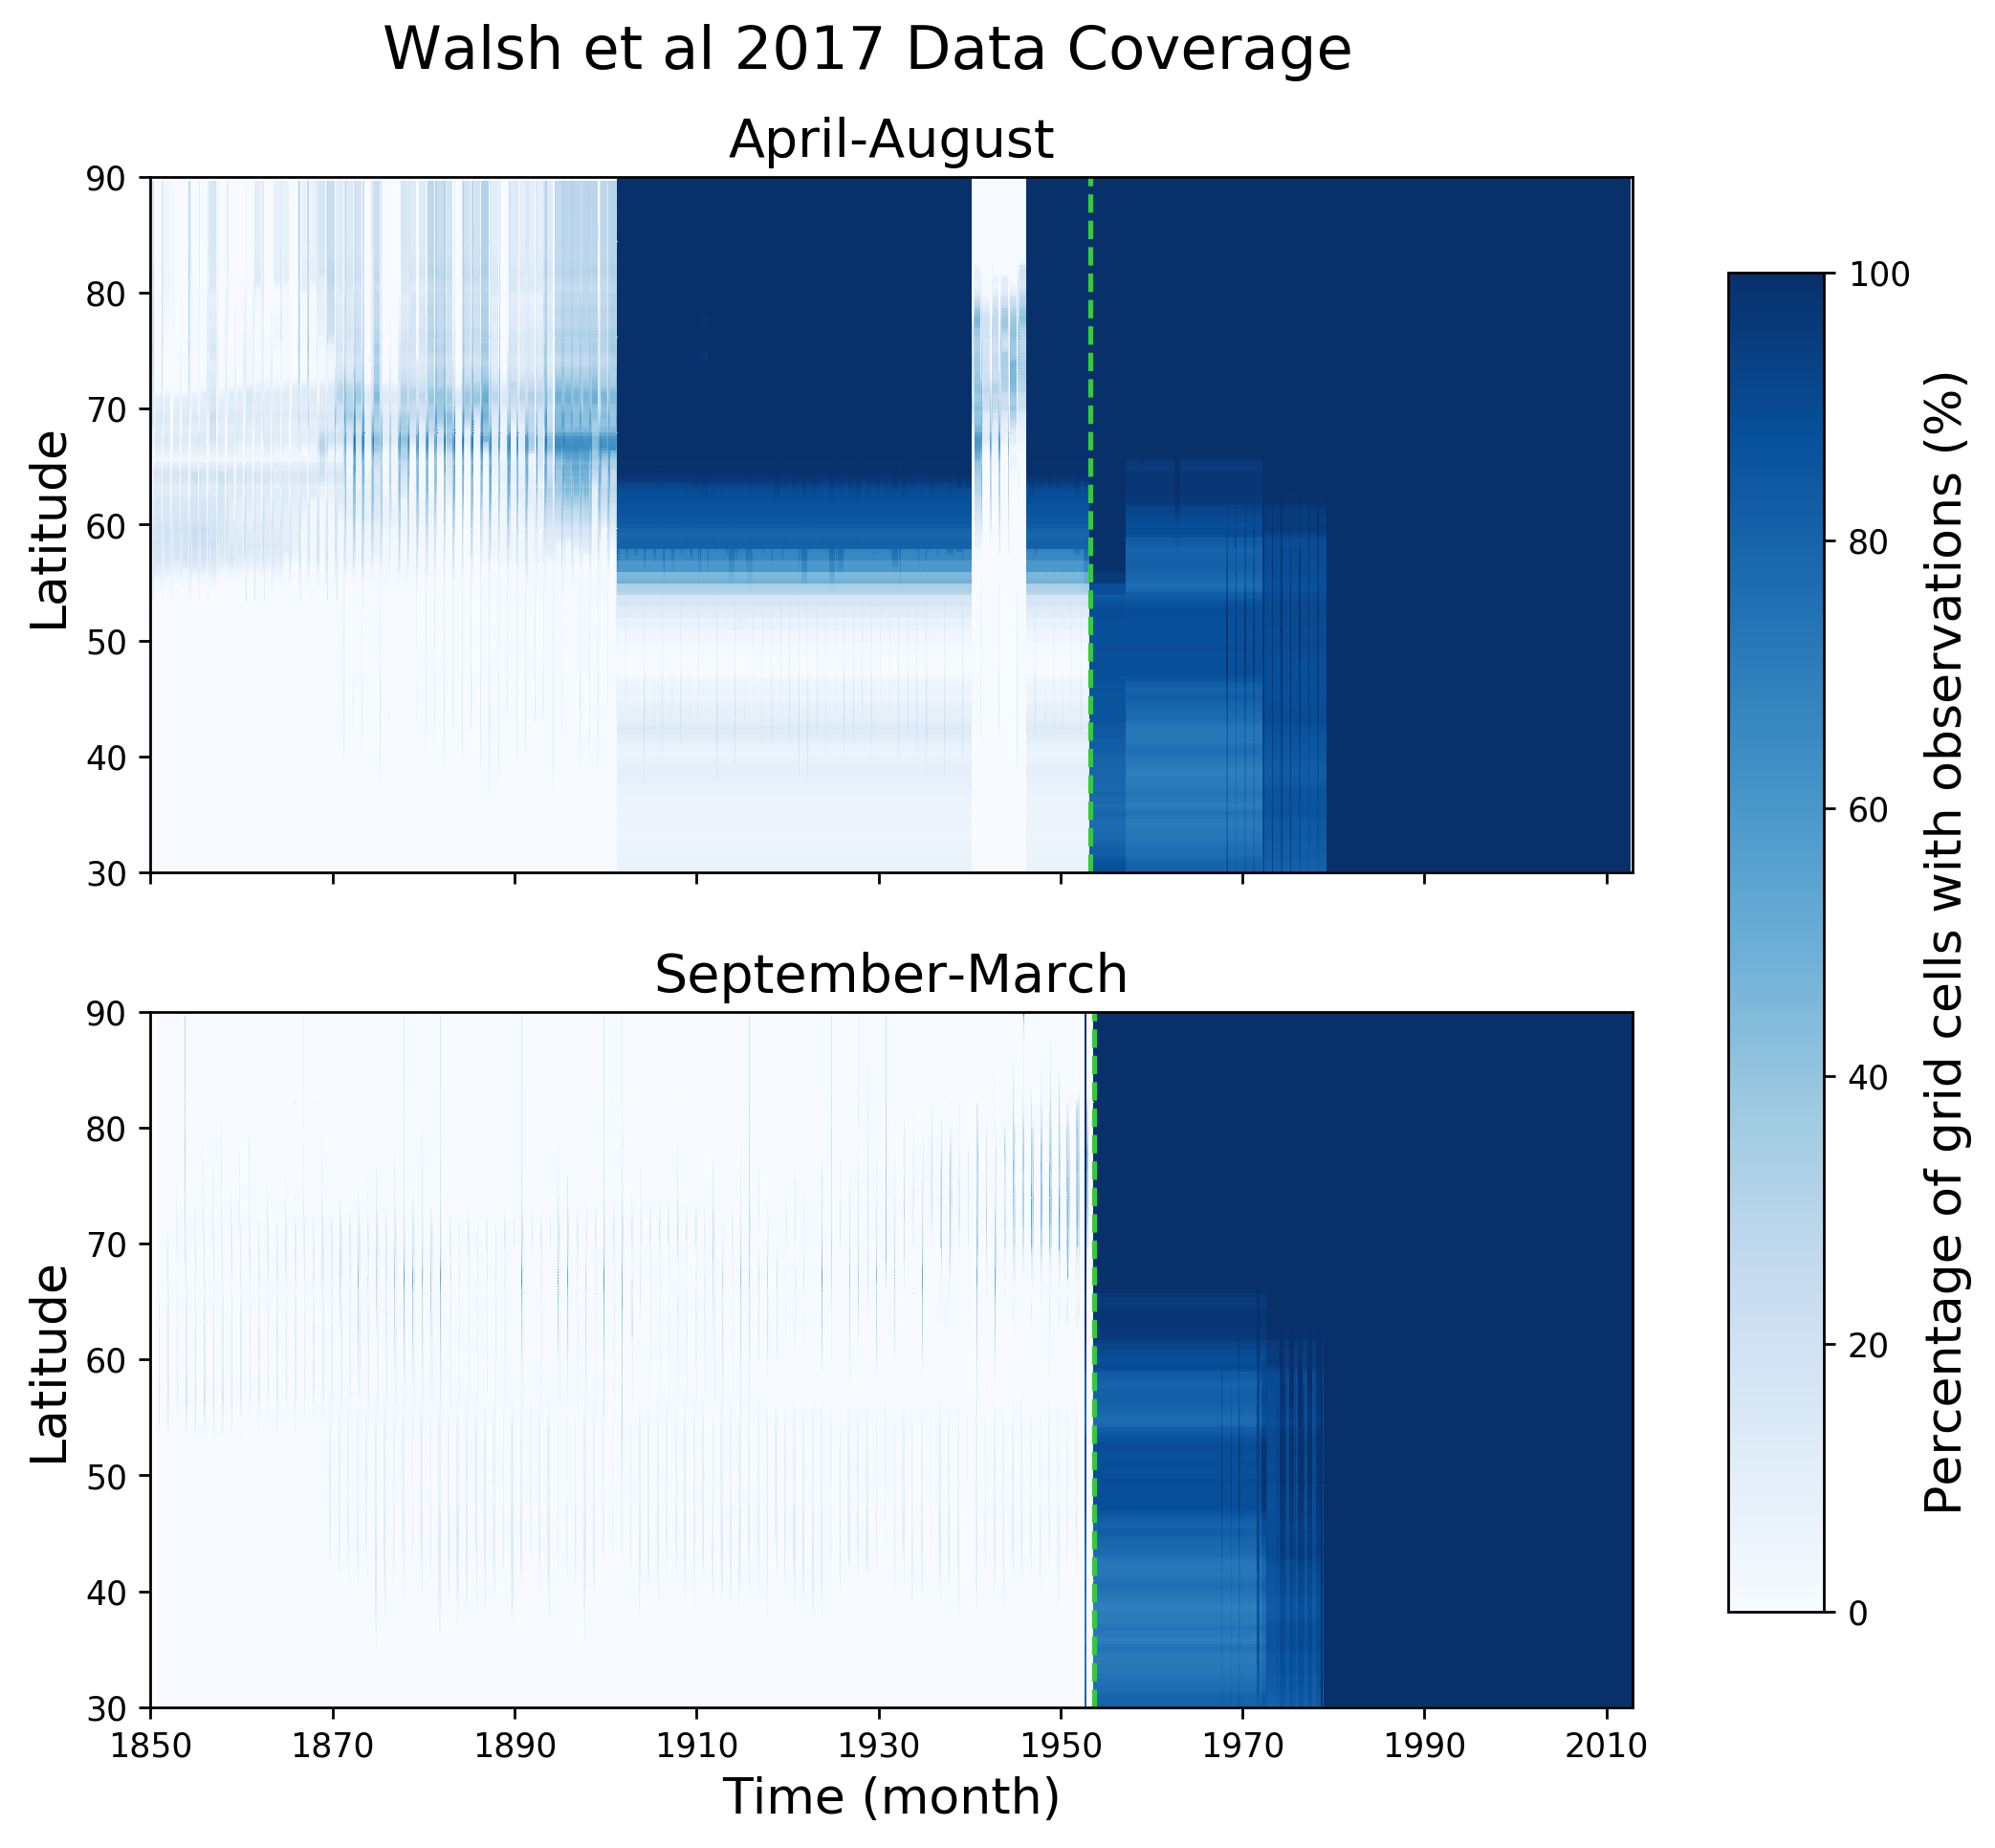

In [12]:
# plot with various axes scales
fig,axarr = plt.subplots(2, sharex=True,figsize=(8, 8))

# first figure
axarr[0].pcolormesh(dt_summer[:-1,:].reshape(163*5),walsh_data.latitude.values,
                    np.reshape(walsh_percent_coverage_summer[:-1,:,:],(163*5,240)).T, cmap='Blues')
axarr[0].set_ylabel('Latitude', fontsize=15)
axarr[0].set_title('April-August', fontsize=16)
axarr[0].set_ylim(30,90,10)

axarr[0].axvline(dt_summer[103,0], linestyle='--', color='limegreen',linewidth=1.5)
#axarr[0].axvline(dt_summer[51,1], linestyle='--', color='limegreen',linewidth=1.5)

# second figure
plot = axarr[1].pcolormesh(dt_winter.reshape(163*7),walsh_data.latitude.values,
                          np.reshape(walsh_percent_coverage_winter,(163*7,240)).T, cmap='Blues')

axarr[1].axvline(dt_winter[103,0], linestyle='--', color='limegreen',linewidth=1.5)

plt.ylabel('Latitude', fontsize=15)
plt.xlabel('Time (month)', fontsize=15)
plt.xlim('1850-01','2012-12',20)
plt.ylim(30,90,10)
plt.title('September-March', fontsize=16)

plt.xticks(np.arange(np.datetime64('1850-01'),np.datetime64('2013-12'),240),
           ('1850','1870','1890','1910','1930','1950','1970','1990','2010'))

fig.subplots_adjust(bottom=0.1, top=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.05, 0.7])
fig.colorbar(plot, cax=cbar_ax).set_label(label='Percentage of grid cells with observations (%)',size=15)

# plt.subplots_adjust(top=0.92, bottom=0.08, left=0.1, right=0.9, hspace=0.25,
#                     wspace=0.35)
fig.suptitle('Walsh et al 2017 Data Coverage', fontsize = 18)

### Plot the mean across months: 

Text(0.5,0.98,'Walsh et al 2017 Data Coverage')

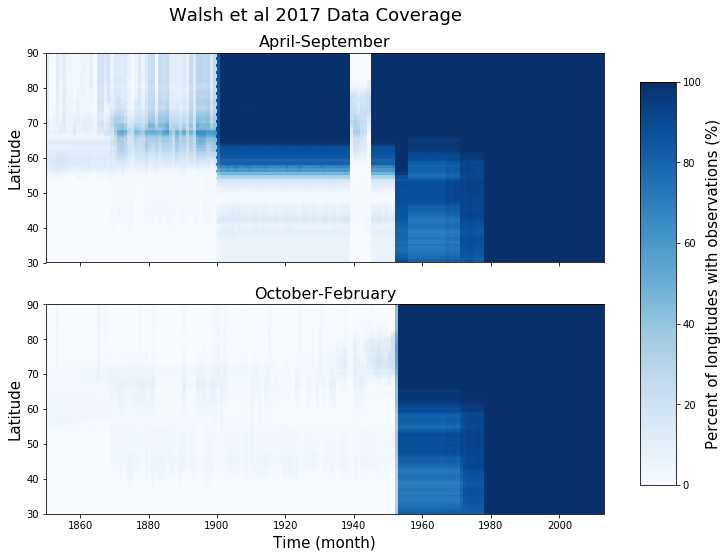

In [7]:
# plot with various axes scales
fig,axarr = plt.subplots(2, sharex=True,figsize=(10, 8))

# first figure
axarr[0].pcolormesh(np.arange(1850,2014,1), walsh_data.latitude.values,
               walsh_percent_coverage_summer_mn.T, cmap='Blues')
axarr[0].set_ylabel('Latitude', fontsize=15)
axarr[0].set_title('April-September', fontsize=16)


# second figure
plot = axarr[1].pcolormesh(np.arange(1850,2014,1), walsh_data.latitude.values,
               walsh_percent_coverage_winter_mn.T, cmap='Blues')

plt.ylabel('Latitude', fontsize=15)
plt.xlabel('Time (month)', fontsize=15)
#plt.xlim(1850,2013,20)
plt.ylim(30,90,10)
plt.title('October-February', fontsize=16)

fig.subplots_adjust(bottom=0.1, top=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.05, 0.7])
fig.colorbar(plot, cax=cbar_ax).set_label(label='Percent of longitudes with observations (%)',size=15)

# plt.subplots_adjust(top=0.92, bottom=0.08, left=0.1, right=0.9, hspace=0.25,
#                     wspace=0.35)
fig.suptitle('Walsh et al 2017 Data Coverage', fontsize = 18)